In [25]:
import pandas as pd

from fbprophet import Prophet

from pyramid.arima import auto_arima

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')

from math import sqrt
from sklearn.metrics import mean_squared_error

In [6]:
# Load the data

air_passengers_data = pd.read_csv(r"D:\time_series_session\AirPassengers.csv")

In [7]:
# Convert the TIMESTAMP Column into DATETIME type

air_passengers_data['Month'] = pd.to_datetime( air_passengers_data['Month'] )
air_passengers_data.set_index( air_passengers_data['Month'], inplace=True )

In [8]:
# Split the data into TEST & TRAIN --- For time-series data you need to be careful with the SEQUENTIAL SPLIT

air_passengers_data['Passengers'] = air_passengers_data['#Passengers']
air_passengers_data.drop(columns=['#Passengers'], inplace=True)

#divide into train and validation set
train = air_passengers_data[:int(0.7*(len(air_passengers_data)))]
valid = air_passengers_data[int(0.7*(len(air_passengers_data))):]

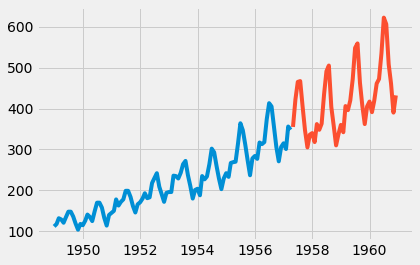

In [19]:
# Remove Redundant Columns
#air_passengers_data.drop(columns=['Month'], inplace=True)

#Plot the respective Train & Test data
plt.plot(train.Passengers)
plt.plot(valid.Passengers)

In [22]:
# Building the AUTO-ARIMA Model

auto_arima_model = auto_arima(train.Passengers, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima_model.fit(train.Passengers)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=886.147, BIC=901.718, Fit time=0.657 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=909.769, BIC=914.959, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=907.370, BIC=915.155, Fit time=0.050 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=904.979, BIC=912.764, Fit time=0.085 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=884.966, BIC=897.942, Fit time=0.425 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=900.136, BIC=910.517, Fit time=0.173 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=886.831, BIC=902.402, Fit time=0.645 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=893.803, BIC=904.183, Fit time=0.358 seconds
Total fit time: 2.425 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [23]:
# Forecast Values for a Fixed Period

forecast = auto_arima_model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast, index = valid.index, columns=['Prediction'])

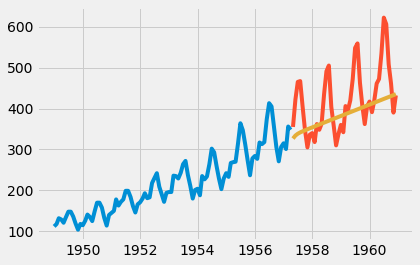

In [24]:
# Plot the TRAIN, VALID & FORECAST values

plt.plot(train.Passengers)
plt.plot(valid.Passengers)
plt.plot(forecast)

In [27]:
# Check for the RMSE Value

rms = sqrt(mean_squared_error(valid.Passengers, forecast))
print(rms)

76.51299013857891


In [73]:
## Build a FORECAST Model using PROPHET

air_passengers_data_prophet = pd.read_csv(r"D:\time_series_session\AirPassengers.csv")

# Convert the Columns to PROPHET specific names
simple_df = air_passengers_data_prophet.rename(columns={'Month': 'ds', '#Passengers': 'y'})

In [74]:
# Fit the data to PROPHET Model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(simple_df)

# Produce Future Dates
#future_dates = prophet_model.make_future_dataframe(periods=18, freq='MS')
#future_dates.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AttributeError: 'StanModel' object has no attribute 'fit_class'

In [76]:
'''
air_passengers_data_prophet = pd.read_csv(r"D:\time_series_session\AirPassengers.csv")

simple_df = air_passengers_data_prophet.rename(columns={'Month': 'ds', '#Passengers': 'y'})
                                                        
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(simple_df)    

future_dates = prophet_model.make_future_dataframe(periods=36, freq='MS')
print (future_dates.tail())

forecast = prophet_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

prophet_model.plot(forecast, uncertainty=True)
'''

6